In [31]:
from api_utils import get_json_from_api
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
json = get_json_from_api('https://fantasy.premierleague.com/api/bootstrap-static/')

In [33]:
print(json.keys())

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])


In [34]:
elements_df = pd.DataFrame(json['elements'])
elememttypes_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])

In [35]:
print(elements_df.columns)
# print(elememttypes_df.columns)
print(teams_df.columns)

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'influence_rank', 'influence_rank_type', 'creativity_rank',
       'creativity_rank_type', 'threat_rank'

In [36]:
teams_df_slim = teams_df[['id', 'name']]
elementtypes_df_slim = elememttypes_df[['id', 'singular_name']]

In [37]:
elements_df_merge1 = pd.merge(elements_df, elementtypes_df_slim, how="left", left_on='element_type', right_on='id')
elements_df_merge2 = pd.merge(elements_df_merge1, teams_df_slim, how='left', left_on='team', right_on='id')

In [38]:
elements_df_merge2.rename(columns={"name": "team2", "singular_name":"pos"}, inplace=True)

In [39]:
elements_df_merge2.to_excel("output.xlsx")

In [40]:
elements_df_merge2.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id_x', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'influence_rank', 'influence_rank_type', 'creativity_rank',
       'creativity_rank_type', 'threat_ran

In [41]:
elements_df_slim = elements_df_merge2[['second_name','team', 'pos', 'selected_by_percent','now_cost','minutes','transfers_in', 'value_season','form', 'value_form', 'value_season', 'total_points', 'transfers_in_event', 'transfers_out_event', 'penalties_order', 'corners_and_indirect_freekicks_order', 'direct_freekicks_order']]

In [44]:
df = elements_df_slim.rename(columns={"name": "team", "singular_name":"pos"}, inplace=True)

/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [43]:
df.head()

NameError: name 'df' is not defined

In [ ]:
def plot_top_of_pos(position = '', min_points = 1, min_minutes = 0, df=df):
  letter_pos = {"G": "Goalkeeper", "D": "Defender", "M": "Midfielder", "F": "Forward"}
  if position in letter_pos.keys():
    position = letter_pos[position]
  elif position == '':
    letter = input('Please select position, (G, D, M or F)')
    position = letter_pos[letter]

  top_in_pos = df[(df['pos'] == position) & (df['minutes'] > min_minutes) & (df['total_points'] > min_points)].sort_values('total_points', ascending=False)
  ax, fig = plt.subplots(figsize = (14,6))
  sns.set_theme(style='whitegrid', context='talk')
  sns.barplot(data = top_in_pos, x='second_name', y='total_points')
  plt.xticks(rotation=90)
  plt.xlabel('')
  plt.ylabel('Total Points')
  plt.title('')
  plt.yticks(range(0, max(df['total_points']), 2))
  plt.show()

In [ ]:
# plot_top_of_pos(position='F')

In [ ]:
gk_data = elements_df_merge2[(elements_df_merge2['pos'] == 'Goalkeeper') & (elements_df_merge2['minutes'] > 0)]
gk_data_slim = gk_data[['second_name','total_points', 'team', 'clean_sheets', 'saves', 'minutes']]

In [ ]:
gk_data_slim.head(10)

,second_name,total_points,team,clean_sheets,saves,minutes
0,Leno,3,1,0,4,180
36,Martínez,7,2,1,5,180
68,Raya Martin,14,3,2,6,180
107,Sánchez,8,4,1,3,180
137,Pope,5,5,0,10,180
173,Mendy,14,6,2,4,180
179,Guaita,11,7,1,6,180
213,Pickford,3,8,0,4,180
234,Schmeichel,10,9,1,6,180
277,Meslier,4,10,0,9,180


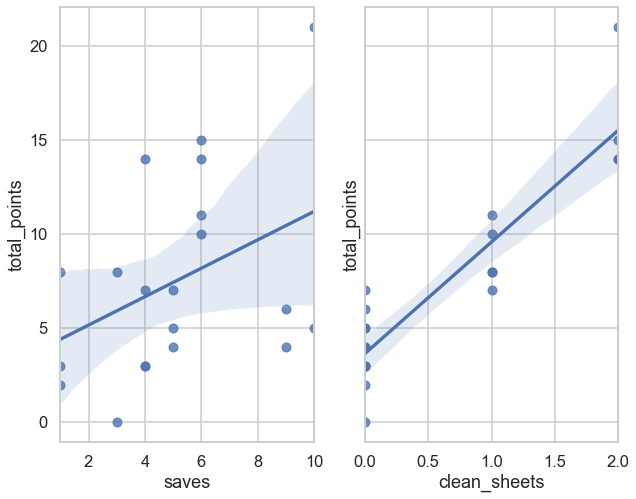

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10,8))
sns.regplot(data=gk_data_slim, y='total_points', x='saves', ax=ax1)
sns.regplot(data=gk_data_slim, y='total_points', x='clean_sheets', ax=ax2)

plt.show()

### This graph shows how much more important it is for a goalkeeper to keep clean sheets than it is for them to make saves.  Therefore, picking a goalkeeper that is part of a good defence is a must.